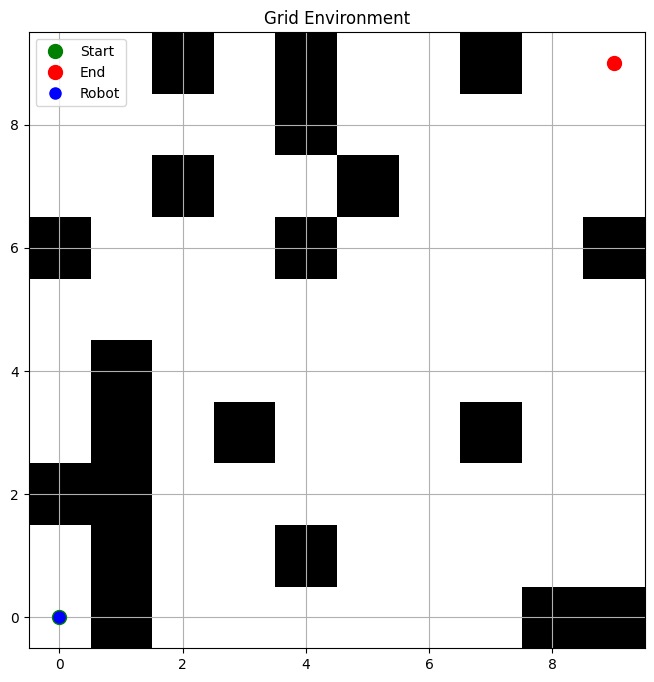

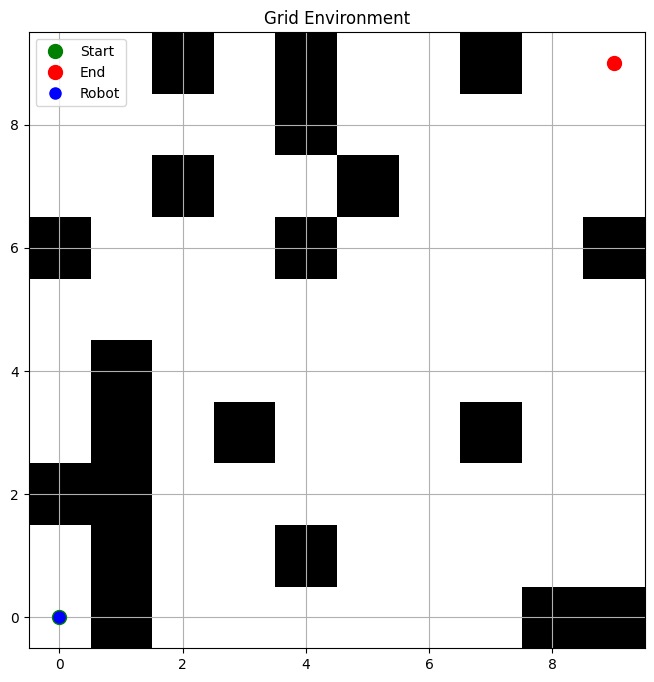

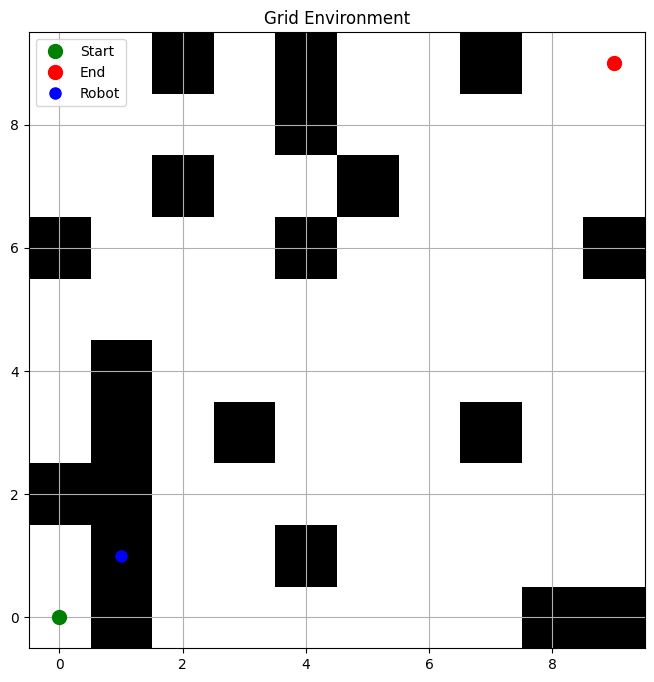

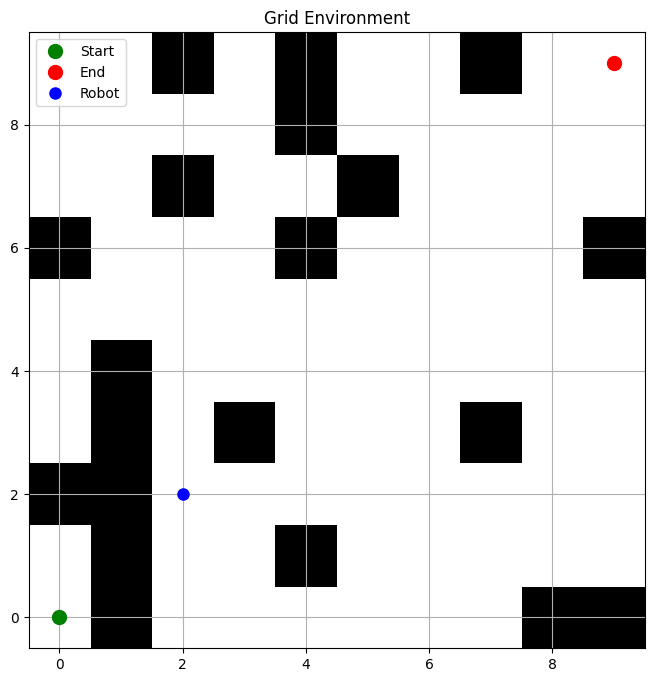

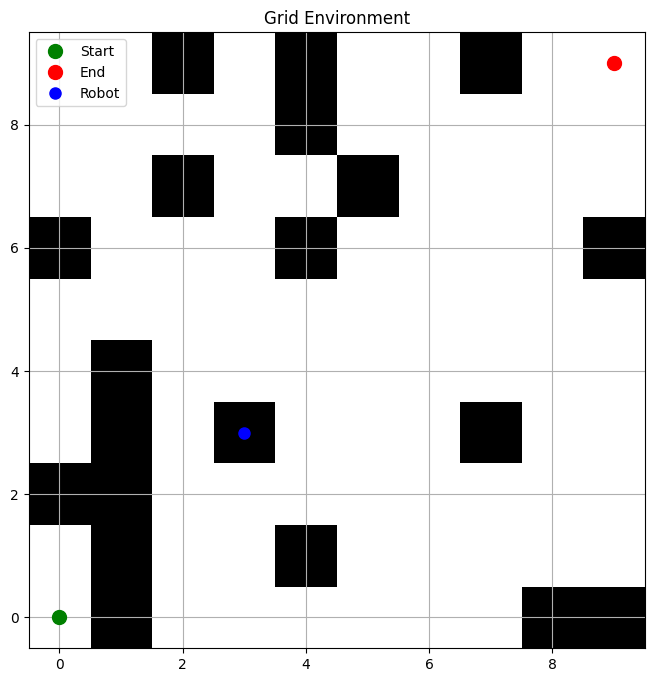

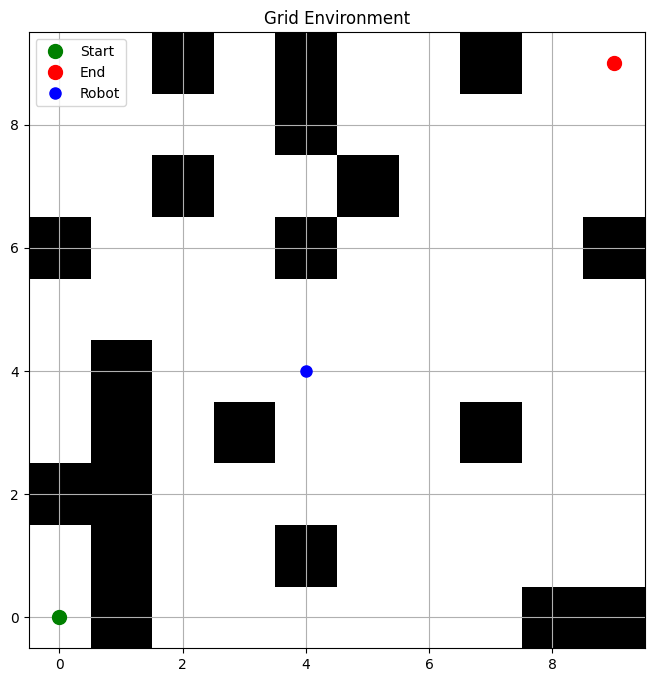

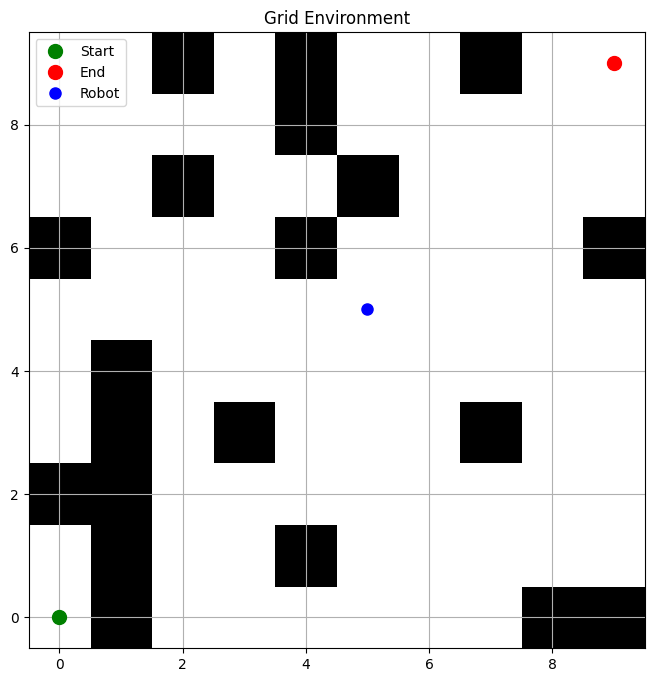

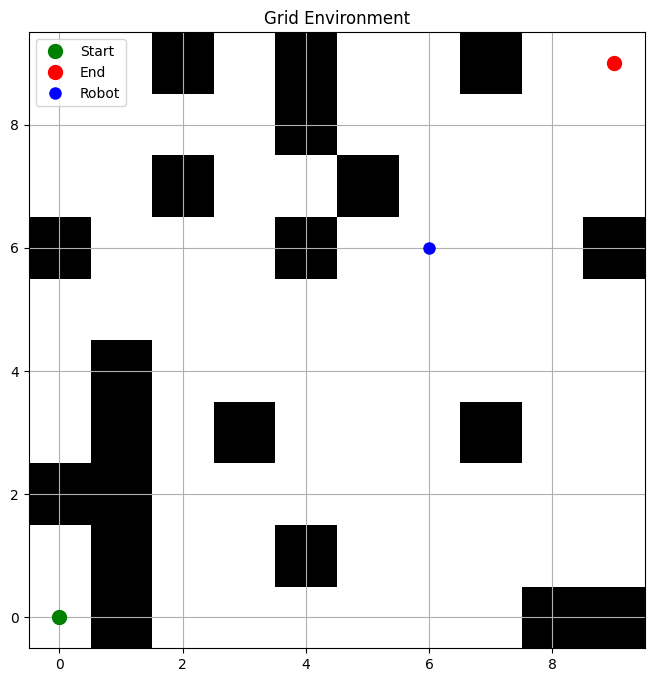

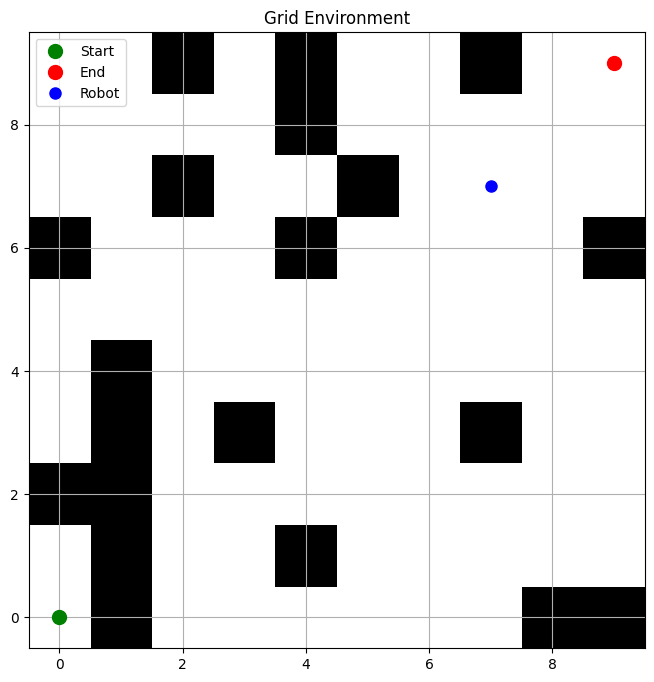

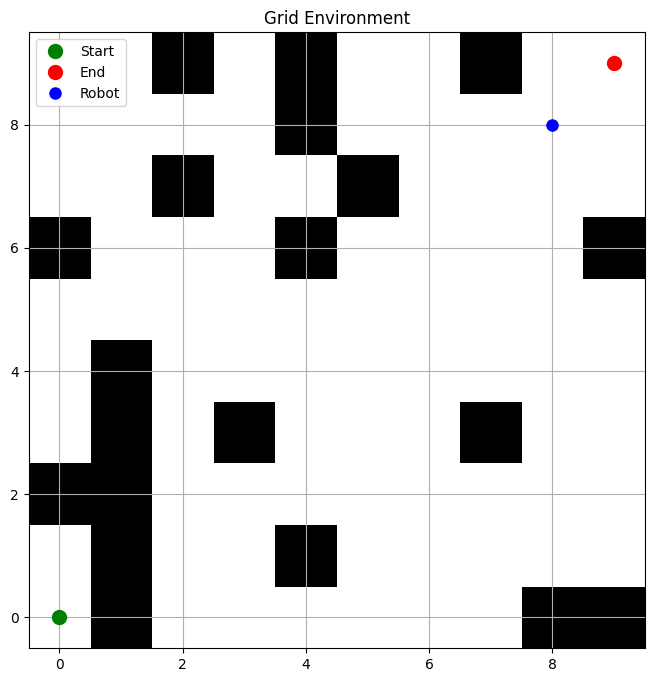

Battery low. Recharging...
Goal reached!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
import random

class Environment:
    def __init__(self, width=10, height=10, obstacle_density=0.2):
        self.width = width
        self.height = height
        self.grid = np.zeros((height, width), dtype=int)
        self.start = (0, 0)
        self.end = (width - 1, height - 1)
        self.generate_obstacles(obstacle_density)

    def generate_obstacles(self, density):
        num_obstacles = int(self.width * self.height * density)
        for _ in range(num_obstacles):
            x, y = random.randint(0, self.width - 1), random.randint(0, self.height - 1)
            self.grid[y, x] = 1

    def get_neighbors(self, x, y):
        neighbors = []
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.width and 0 <= ny < self.height:
                    neighbors.append((nx, ny))
        return neighbors

class PriorityQueue:
    def __init__(self):
        self.queue = []

    def put(self, item):
        heapq.heappush(self.queue, item)

    def get(self):
        return heapq.heappop(self.queue)

def a_star_search(env, start, goal):
    frontier = PriorityQueue()
    frontier.put((0, start, 0))  # (cost, current_node, heuristic)
    visited = set()
    came_from = {}
    cost_so_far = {start: 0}

    while frontier:
        current_cost, current, heuristic = frontier.get()
        if current == goal:
            return reconstruct_path(came_from, current)
        if current in visited:
            continue
        visited.add(current)

        for neighbor in env.get_neighbors(*current):
            new_cost = cost_so_far[current] + 1  # Assuming uniform cost for each move
            if neighbor not in visited and neighbor not in [item[1] for item in frontier.queue]:
                frontier.put((new_cost + manhattan_distance(neighbor, goal), neighbor, manhattan_distance(neighbor, goal)))
                came_from[neighbor] = current
                cost_so_far[neighbor] = new_cost

    return None

def manhattan_distance(start, goal):
    x1, y1 = start
    x2, y2 = goal
    return abs(x1 - x2) + abs(y1 - y2)

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    return path[::-1]

class Agent:
    def __init__(self, env, start, end, energy_capacity=100):
        self.env = env
        self.start = start
        self.end = end
        self.energy_capacity = energy_capacity
        self.energy = energy_capacity
        self.path = []
        self.position = start

    def move(self):
        if not self.path:
            self.path = a_star_search(self.env, self.position, self.end)
        if self.path:
            next_step = self.path.pop(0)
            self.position = next_step
            self.energy -= 10  # 10% energy consumption per move
            if self.energy <= 0:
                self.recharge()
        else:
            print("No valid path found.")

    def recharge(self):
        print("Battery low. Recharging...")
        self.energy = self.energy_capacity

def visualize_environment(env, agent):
    plt.figure(figsize=(8, 8))
    plt.imshow(env.grid, cmap='binary', origin='lower')

    plt.plot(agent.start[0], agent.start[1], 'go', markersize=10, label='Start')
    plt.plot(agent.end[0], agent.end[1], 'ro', markersize=10, label='End')

    plt.plot(agent.position[0], agent.position[1], 'bo', markersize=8, label='Robot')

    plt.title('Grid Environment')
    plt.legend()
    plt.grid(visible=True)
    plt.show()

def simulate():
    env = Environment()
    agent = Agent(env, env.start, env.end)

    while agent.position != agent.end:
        visualize_environment(env, agent)
        agent.move()

    print("Goal reached!")

if __name__ == "__main__":
    simulate()
